In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib
from sklearn import metrics

# Entrada dos dados de teste

In [2]:
df = pd.read_csv('aqvim.csv')

In [140]:
def plot_confusion_matrix(y_true, y_pred, classes, nome,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10), dpi=400)
    #fig.suptitle(title, fontsize=22, fontweight='bold')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    plt.colorbar(im, cax=cax)
    
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='MOS',
           xlabel='VQM')
    
    plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
             rotation_mode="anchor")
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):\
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(nome+".pdf", bbox_inches='tight')
    return ax

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [28]:
jpeg = df[(df['jp?'] == 'jpg')]
jp2k = df[(df['jp?'] == 'jp2')]

# Gráficos JPEG

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
data = jpeg[['epm', 'gwm', 'msim']].values
target = jpeg['mos'].values

y_pred = []
    
for i in range(len(target)):
    y_pred.append(gnb.fit(np.delete(data, i, 0), np.delete(target, i, 0)).predict([data[i], data[i]])[0])

print ('Acuracia:')        
accuracy_score(y_pred,target)



Acuracia:


0.7916666666666666

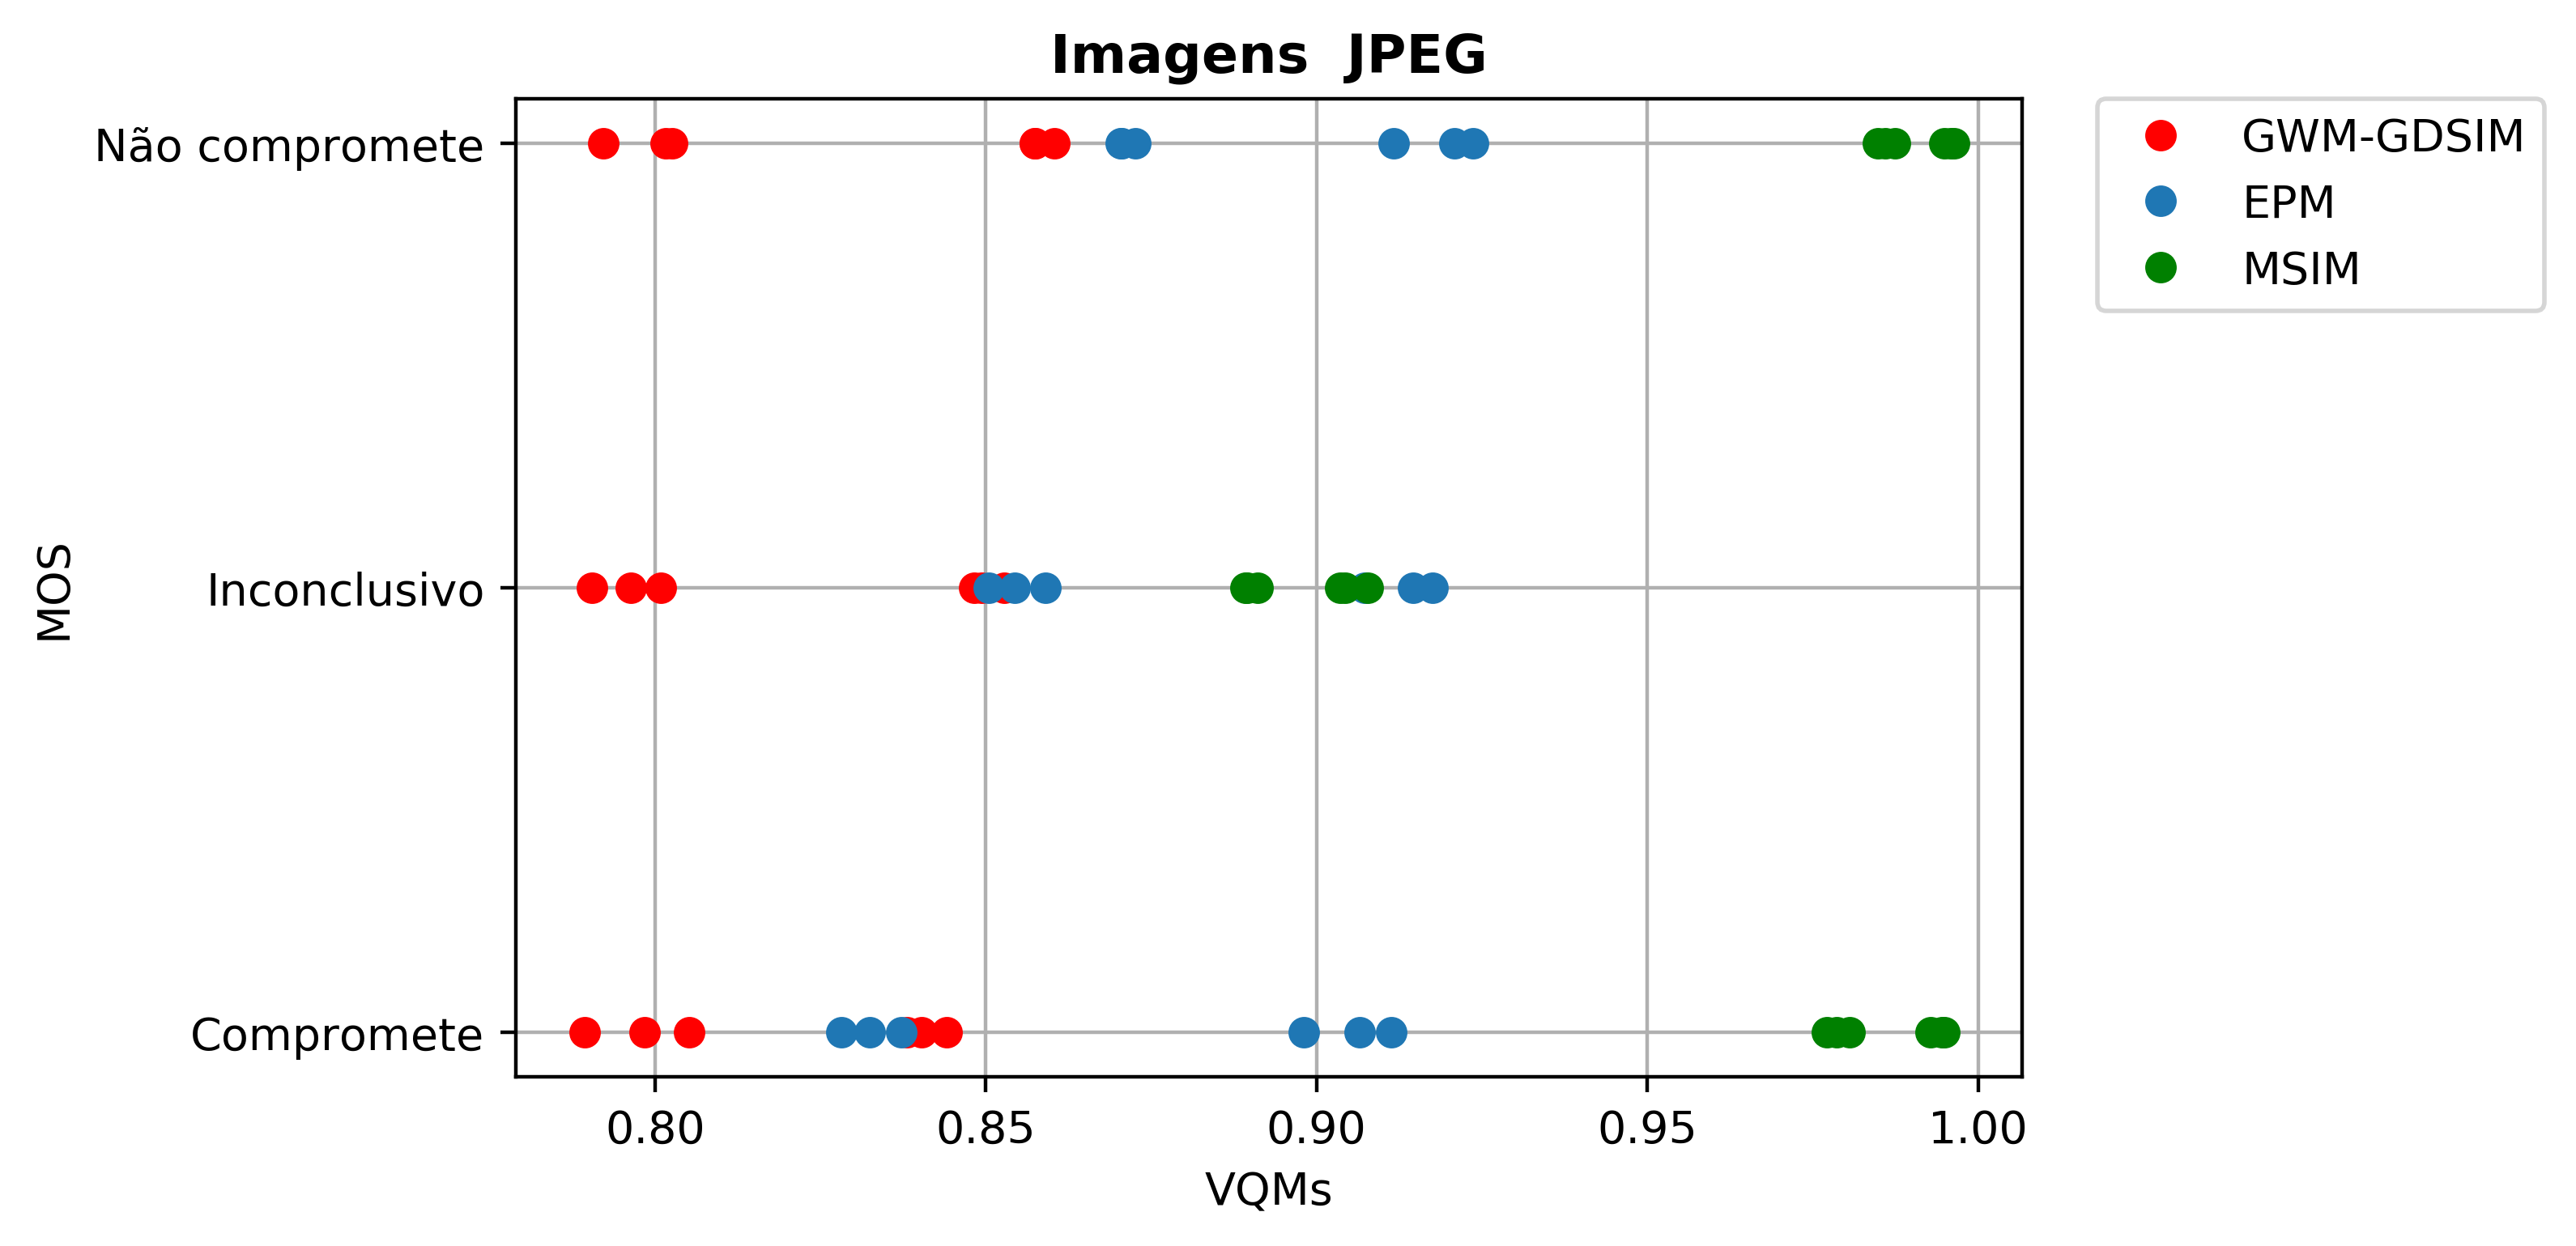

In [26]:
f = plt.figure(figsize=(6,4), dpi=400)
plt.plot(data[:, 1], target, 'ro', label = 'GWM-GDSIM')
plt.plot(data[:, 0], target, 'o', label='EPM')
plt.plot(data[:, 2], target, 'go', label = 'MSIM')
plt.grid()
plt.yticks(np.arange(3)+1, ('Compromete', 'Inconclusivo', 'Não compromete'))
plt.title("Imagens  JPEG", fontweight='bold')
plt.xlabel('VQMs')
plt.ylabel('MOS')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.savefig("jpg.pdf", bbox_inches='tight')

Mapeamento Estatístico:

In [25]:
from scipy import stats
vqms_names = ['EPM', 'GMW-GDSIM', 'MSSIM']
for i in range(3):
    print (vqms_names[i]+':')
    print (stats.pearsonr(data[:,i],target), stats.spearmanr(data[:,i],target), stats.f_oneway(data[:,i], target))

EPM:
(0.3284413991177875, 0.18328950938977145) SpearmanrResult(correlation=0.4327892114505486, pvalue=0.07282478033526874) F_onewayResult(statistic=31.789650223257233, pvalue=2.5427400239027337e-06)
GMW-GDSIM:
(0.14208023815783388, 0.5738530526293716) SpearmanrResult(correlation=0.27541131637762184, pvalue=0.26866108935303973) F_onewayResult(statistic=35.251394608768955, pvalue=1.0387498589323583e-06)
MSSIM:
(0.04177256289878241, 0.8692795821718091) SpearmanrResult(correlation=0.20983719343056897, pvalue=0.4033154688024223) F_onewayResult(statistic=27.592190742403584, pvalue=8.067893049682736e-06)


In [30]:
print ('Rede bayesiana:')
print (stats.pearsonr(y_pred,target), stats.spearmanr(y_pred,target), stats.f_oneway(y_pred, target))

Rede bayesiana:
(0.37721676807715887, 0.06919759251231894) SpearmanrResult(correlation=0.4141738294649303, pvalue=0.04420853414860289) F_onewayResult(statistic=0.12041884816753927, pvalue=0.7301632606016597)


Tabela de Contingência:

Normalized confusion matrix
[[0.5        0.         0.5       ]
 [0.         1.         0.        ]
 [0.16666667 0.         0.83333333]]


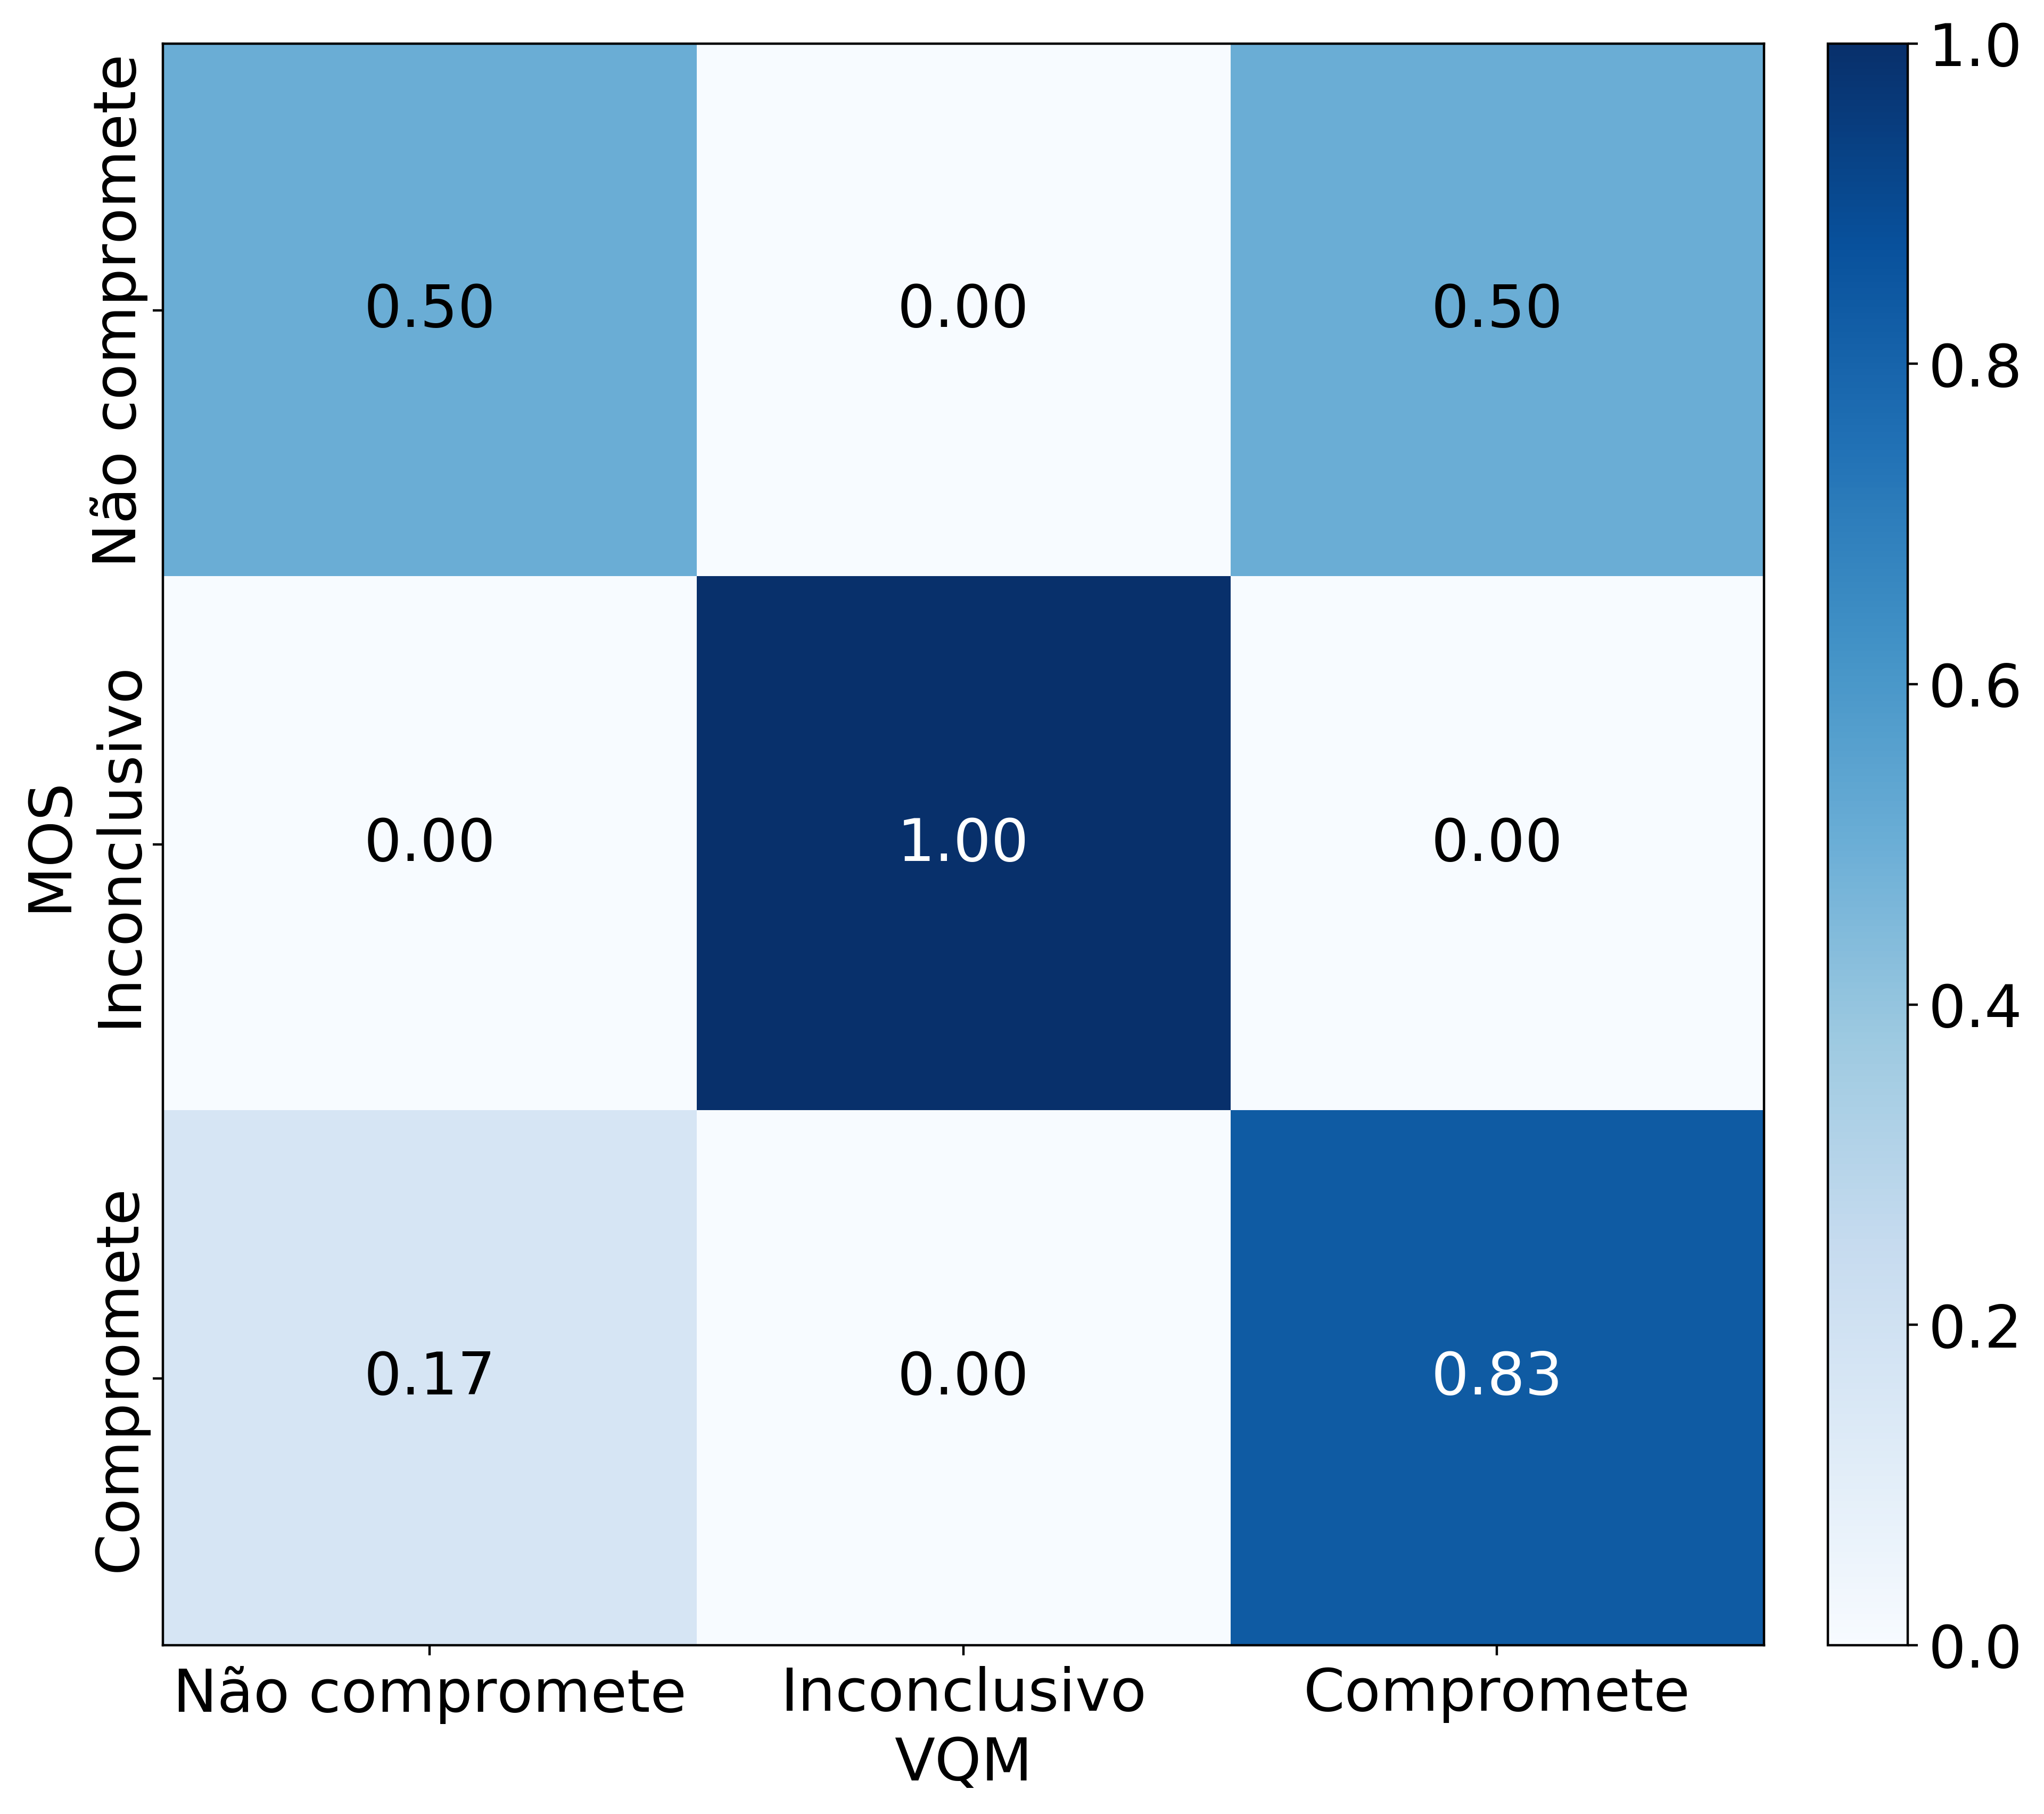

In [143]:
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=30)
plot_confusion_matrix(target, y_pred, classes=['Não compromete', 'Inconclusivo', 'Compromete'], normalize=True, nome='confusion_jpeg', title='JPEG')

Teste de Kolmogorov-Smirnov:

In [159]:
jpeg['rede'] = y_pred

c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=12)
def get_ks_plot(vqm):
    jpeg[vqm+'_trunc'] = list(map(lambda x: round(x, 3), jpeg[vqm].values))
    tpr = []
    fpr = []
    vqm_values = np.unique(np.sort(jpeg[vqm+'_trunc'].values))
    for w in vqm_values:
        temp  = jpeg[jpeg[vqm+'_trunc']==w]
        mos = temp['mos'].values
        n_aceita = sum(mos<3)/(sum(jpeg['mos'].values<3))
        aceita = sum(mos==3)/(sum(jpeg['mos'].values==3))
        tpr.append(n_aceita)
        fpr.append(aceita)
    
    tpr = np.cumsum(tpr)
    fpr = np.cumsum(fpr)
    s_index = np.argmax(np.abs(np.array(tpr)-np.array(fpr)))
    return tpr, fpr, s_index, vqm_values


tpr_gwm, fpr_gwm, s_index_gwm, gwm_values = get_ks_plot('gwm')
tpr_epm, fpr_epm, s_index_epm, epm_values = get_ks_plot('epm')
tpr_msim, fpr_msim, s_index_msim, msim_values = get_ks_plot('msim')
tpr_rede, fpr_rede, s_index_rede, rede_values = get_ks_plot('rede')
print (epm_values[s_index_epm], tpr_epm[s_index_epm], fpr_epm[s_index_epm])
print (gwm_values[s_index_gwm], tpr_gwm[s_index_gwm], fpr_gwm[s_index_gwm])
print (msim_values[s_index_msim], tpr_msim[s_index_msim], fpr_msim[s_index_msim])

c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.859 0.49999999999999994 0.0
0.853 1.0 0.5
0.981 0.75 0.0
2.0 0.75 0.16666666666666666


c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

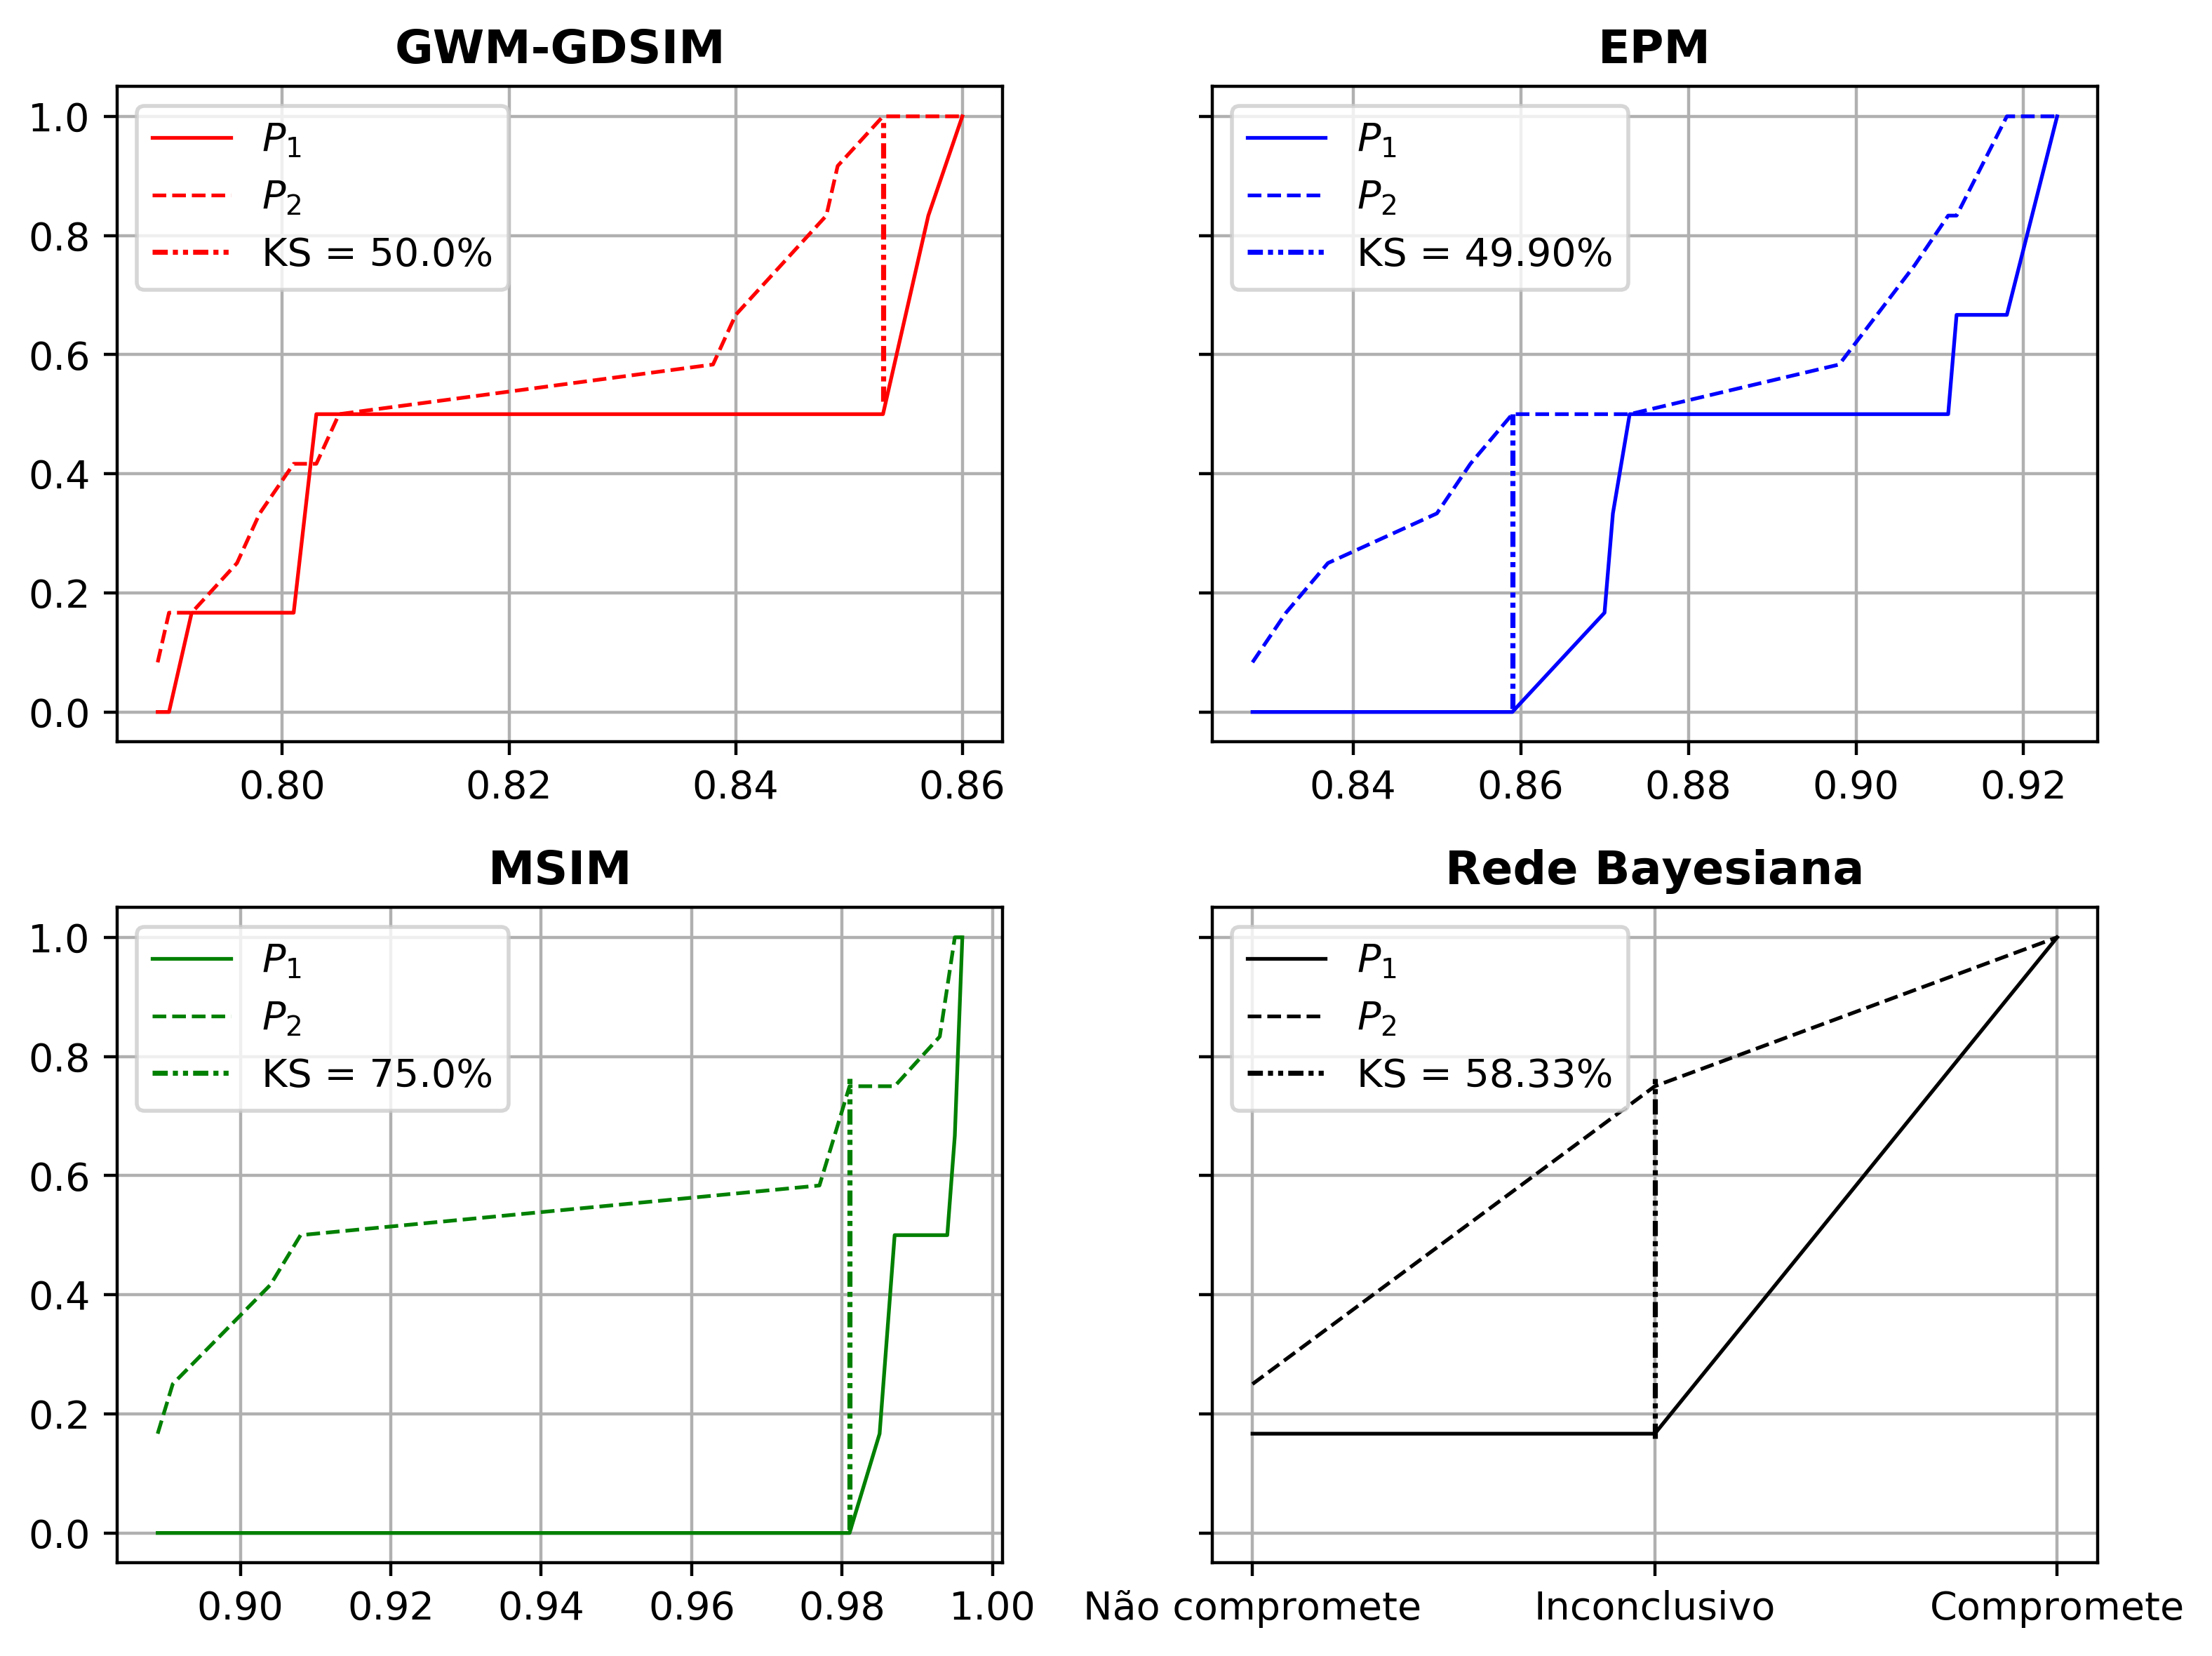

In [168]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2,
                               figsize=(8, 6), sharey=True, dpi=400)
#fig.suptitle('Imagens JPEG')
#ax1.plot(fpr, tpr, 'k',label= 'Rede bayesiana', linewidth = 0.9)
ax2.plot(epm_values, fpr_epm, 'b', linewidth = 0.95, label = r'$P_1$')
ax2.plot(epm_values, tpr_epm, 'b', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax2.axvline(x=epm_values[s_index_epm], ymin=fpr_epm[s_index_epm]+0.05, ymax=tpr_epm[s_index_epm], color='b', linewidth=1.3, label='KS = '+'49.90'+ '%', linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax1.plot(gwm_values, fpr_gwm, 'r', linewidth = 0.95, label = r'$P_1$')
ax1.plot(gwm_values, tpr_gwm, 'r', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax1.axvline(x=gwm_values[s_index_gwm], ymin=fpr_gwm[s_index_gwm]+0.02, ymax=0.95, color='r', linewidth=1.3, label='KS = '+str(round((tpr_gwm[s_index_gwm] -fpr_gwm[s_index_gwm]), 2)*100) + '%', linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax3.plot(msim_values, fpr_msim, 'g', linewidth = 0.95, label = r'$P_1$')
ax3.plot(msim_values, tpr_msim, 'g', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax3.axvline(x=msim_values[s_index_msim], ymin=0.05, ymax=0.739, color='g', linewidth=1.3, label='KS = '+str(round((tpr_msim[s_index_msim] -fpr_msim[s_index_msim]), 2)*100) + '%', linestyle = (0, (3, 1, 1, 1, 1, 1)))


ax4.plot(rede_values, fpr_rede, 'k', linewidth = 0.95, label = r'$P_1$')
ax4.plot(rede_values, tpr_rede, 'k', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax4.axvline(x=rede_values[s_index_rede], ymin=0.19, ymax=0.739, color='k', linewidth=1.3, label='KS = '+str(round((tpr_rede[s_index_rede] -fpr_rede[s_index_rede])*100, 2)) + '%', linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.set_title('GWM-GDSIM', fontweight='bold')
ax2.set_title('EPM', fontweight='bold')
ax3.set_title('MSIM', fontweight='bold')
ax4.set_title('Rede Bayesiana', fontweight='bold')
ax4.set_xticks([1,2,3]) 
ax4.set_xticklabels(['Não compromete','Inconclusivo','Compromete'])
fig.tight_layout()
fig.savefig("ks_jpeg.pdf", bbox_inches='tight')

Tabela de contingência após discretização:

In [175]:
SMALL_SIZE = 30
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

0.72 0.67 0.87 0.73


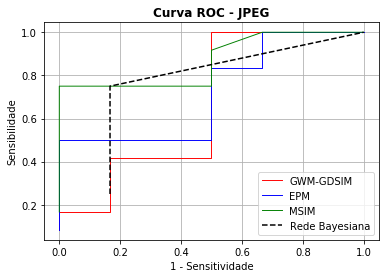

In [169]:
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=12)
print (round(metrics.auc(fpr_epm, tpr_epm), 2), round(metrics.auc(fpr_gwm, tpr_gwm), 2), round(metrics.auc(fpr_msim, tpr_msim) , 2), round(metrics.auc(fpr_rede, tpr_rede), 2))
fig = plt.figure()
plt.plot(fpr_gwm, tpr_gwm, 'r',label= 'GWM-GDSIM', linewidth=0.95)
plt.plot(fpr_epm, tpr_epm, 'b',label= 'EPM', linewidth=0.95)
plt.plot(fpr_msim, tpr_msim, 'g',label= 'MSIM', linewidth=0.95)

plt.plot(fpr_rede, tpr_rede, 'k--',label='Rede Bayesiana' )
plt.ylabel('Sensibilidade')
plt.xlabel('1 - Sensitividade')
plt.grid()
plt.title('Curva ROC - JPEG', fontweight='bold')
plt.legend()
fig.savefig("roc_jpeg.pdf", bbox_inches='tight')


# Gráficos JPEG 2000

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
data = jp2k[['epm', 'gwm', 'msim']].values
target = jp2k['mos'].values
y_pred = []
    
for i in range(len(target)):
    y_pred.append(gnb.fit(np.delete(data, i, 0), np.delete(target, i, 0)).predict([data[i], data[i]])[0])

print ('Acuracia:')
print (accuracy_score(y_pred,target))


Acuracia:
0.8333333333333334


In [86]:
from scipy import stats

for i in range(3):
    print (vqms_names[i]+':')
    print (stats.pearsonr(data[:,i],target), stats.spearmanr(data[:,i],target), stats.f_oneway(data[:,i], target))

EPM:
(0.48615400142387555, 0.0407925959388568) SpearmanrResult(correlation=0.39344473768231686, pvalue=0.10623685758163427) F_onewayResult(statistic=29.733716393252298, pvalue=4.4314219498145445e-06)
GMW-GDSIM:
(0.8622596947852109, 4.190574592725129e-06) SpearmanrResult(correlation=0.8786932474905078, pvalue=1.6006933001958262e-06) F_onewayResult(statistic=34.020756823739276, pvalue=1.4201644427198841e-06)
MSSIM:
(0.49131792227677157, 0.03839120315924531) SpearmanrResult(correlation=0.45901886062936975, pvalue=0.055345956352441446) F_onewayResult(statistic=25.8689607850744, pvalue=1.3281664324459147e-05)


In [78]:
print (stats.pearsonr(y_pred,target), stats.spearmanr(y_pred,target), stats.f_oneway(y_pred, target))

(0.8764598212022147, 1.9695775625952634e-08) SpearmanrResult(correlation=0.9316949906249123, pvalue=3.785399166357348e-11) F_onewayResult(statistic=0.12849162011173185, pvalue=0.7216410354756628)


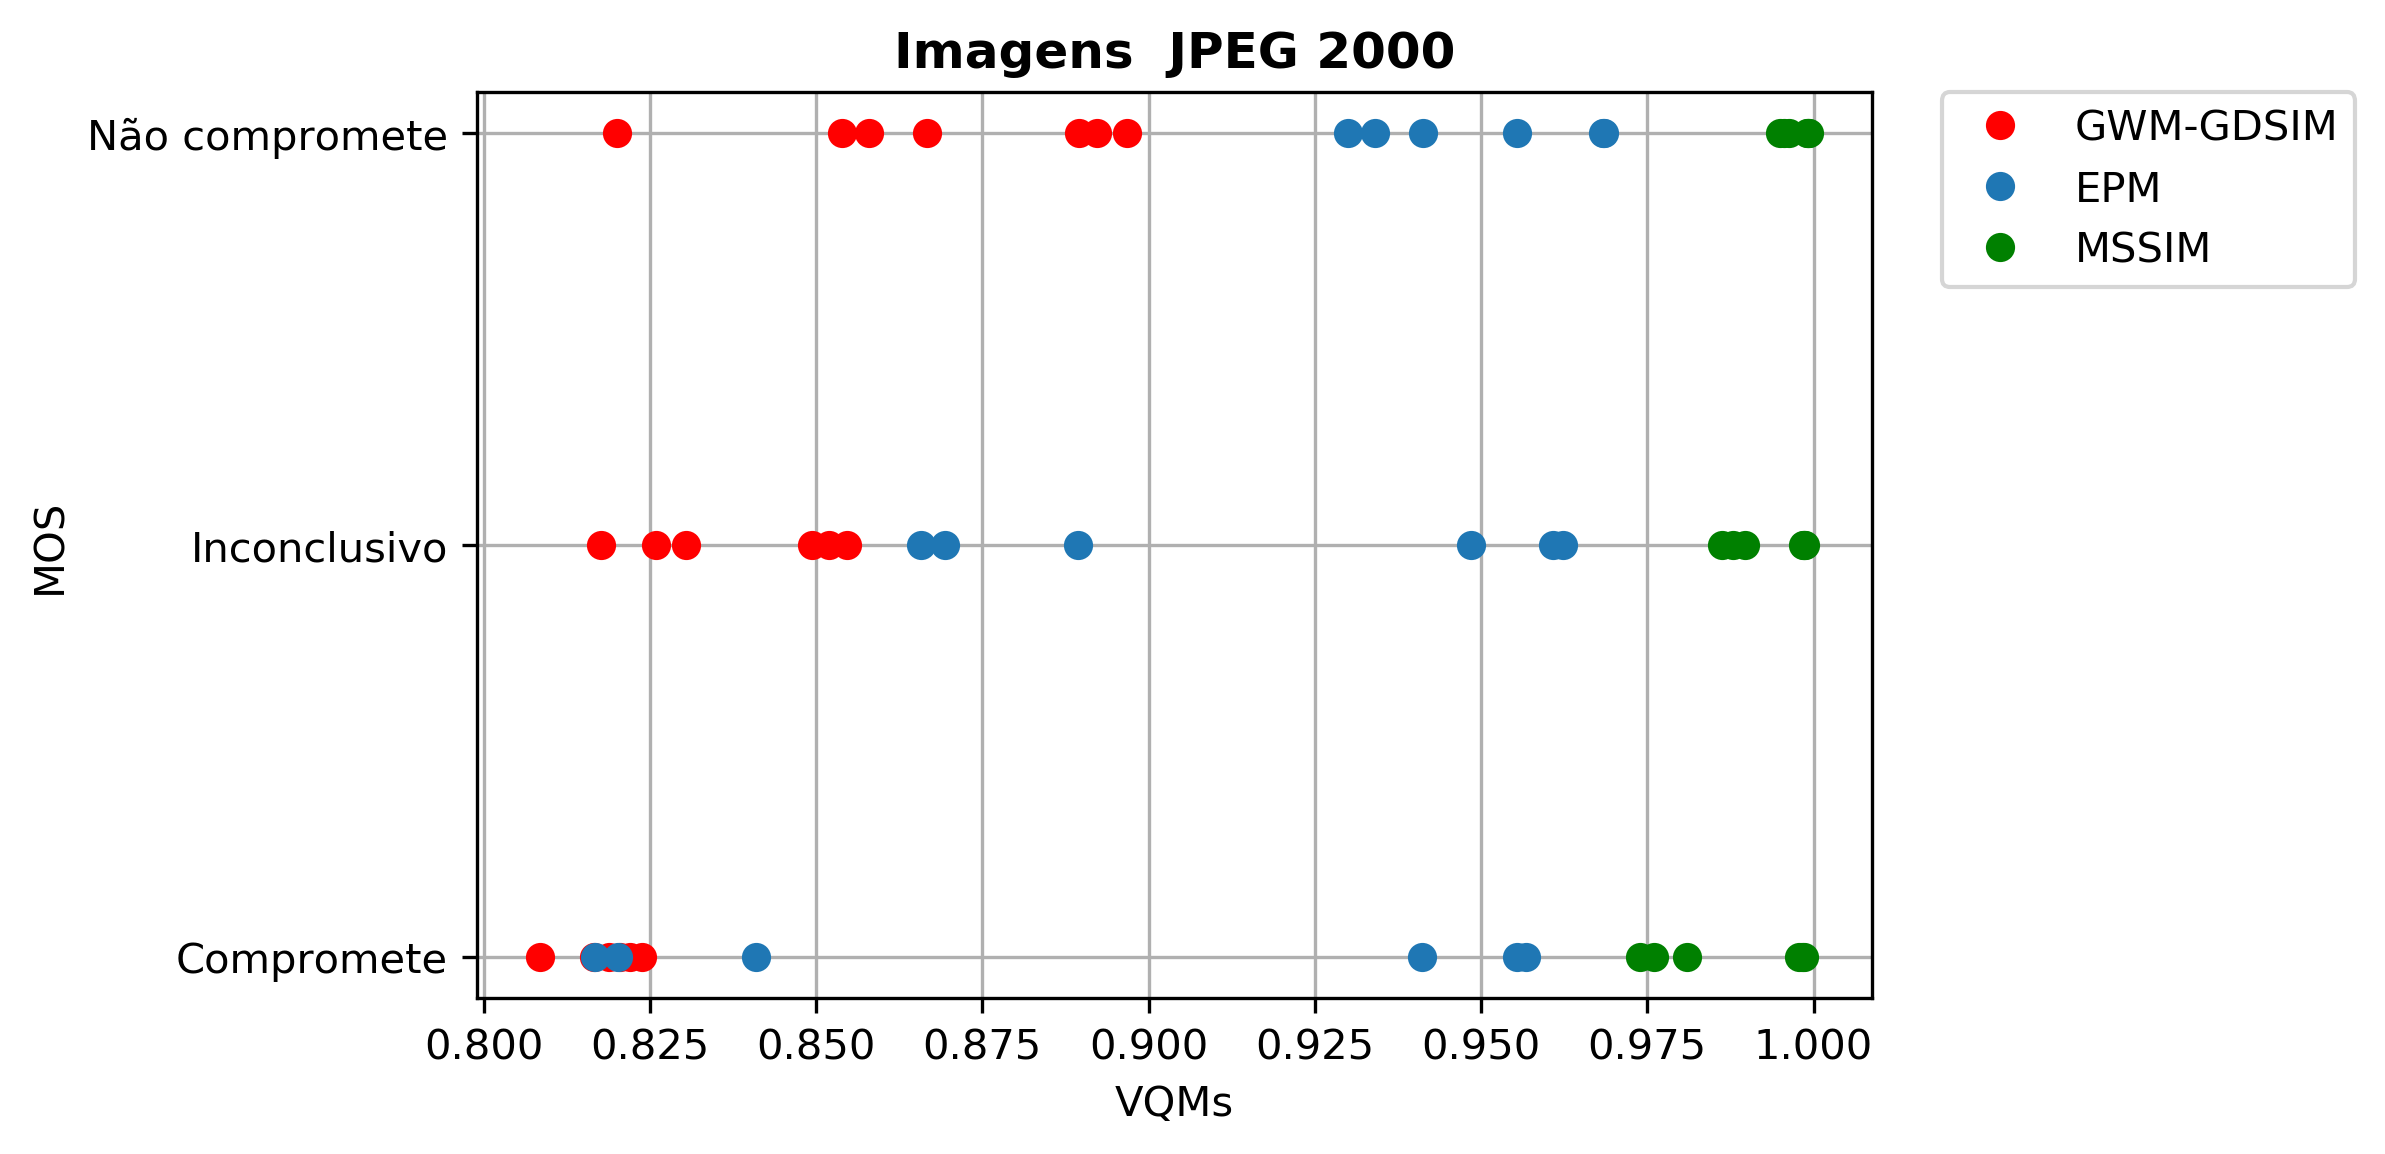

In [87]:
f = plt.figure(figsize=(6,4), dpi=300)
plt.plot(data[:, 1], target, 'ro', label = 'GWM-GDSIM')
plt.plot(data[:, 0], target, 'o', label='EPM')
plt.plot(data[:, 2], target, 'go', label = 'MSSIM')
plt.plot([0.82], [3], 'ro')
plt.yticks(np.arange(3)+1, ('Compromete', 'Inconclusivo', 'Não compromete'))
plt.grid()
plt.title("Imagens  JPEG 2000", fontweight='bold')
plt.xlabel('VQMs')
plt.ylabel('MOS')
plt.savefig('jp2k.png')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.savefig("jp2k.pdf", bbox_inches='tight')

Normalized confusion matrix
[[0.5        0.5        0.        ]
 [0.16666667 0.83333333 0.        ]
 [0.         0.         1.        ]]


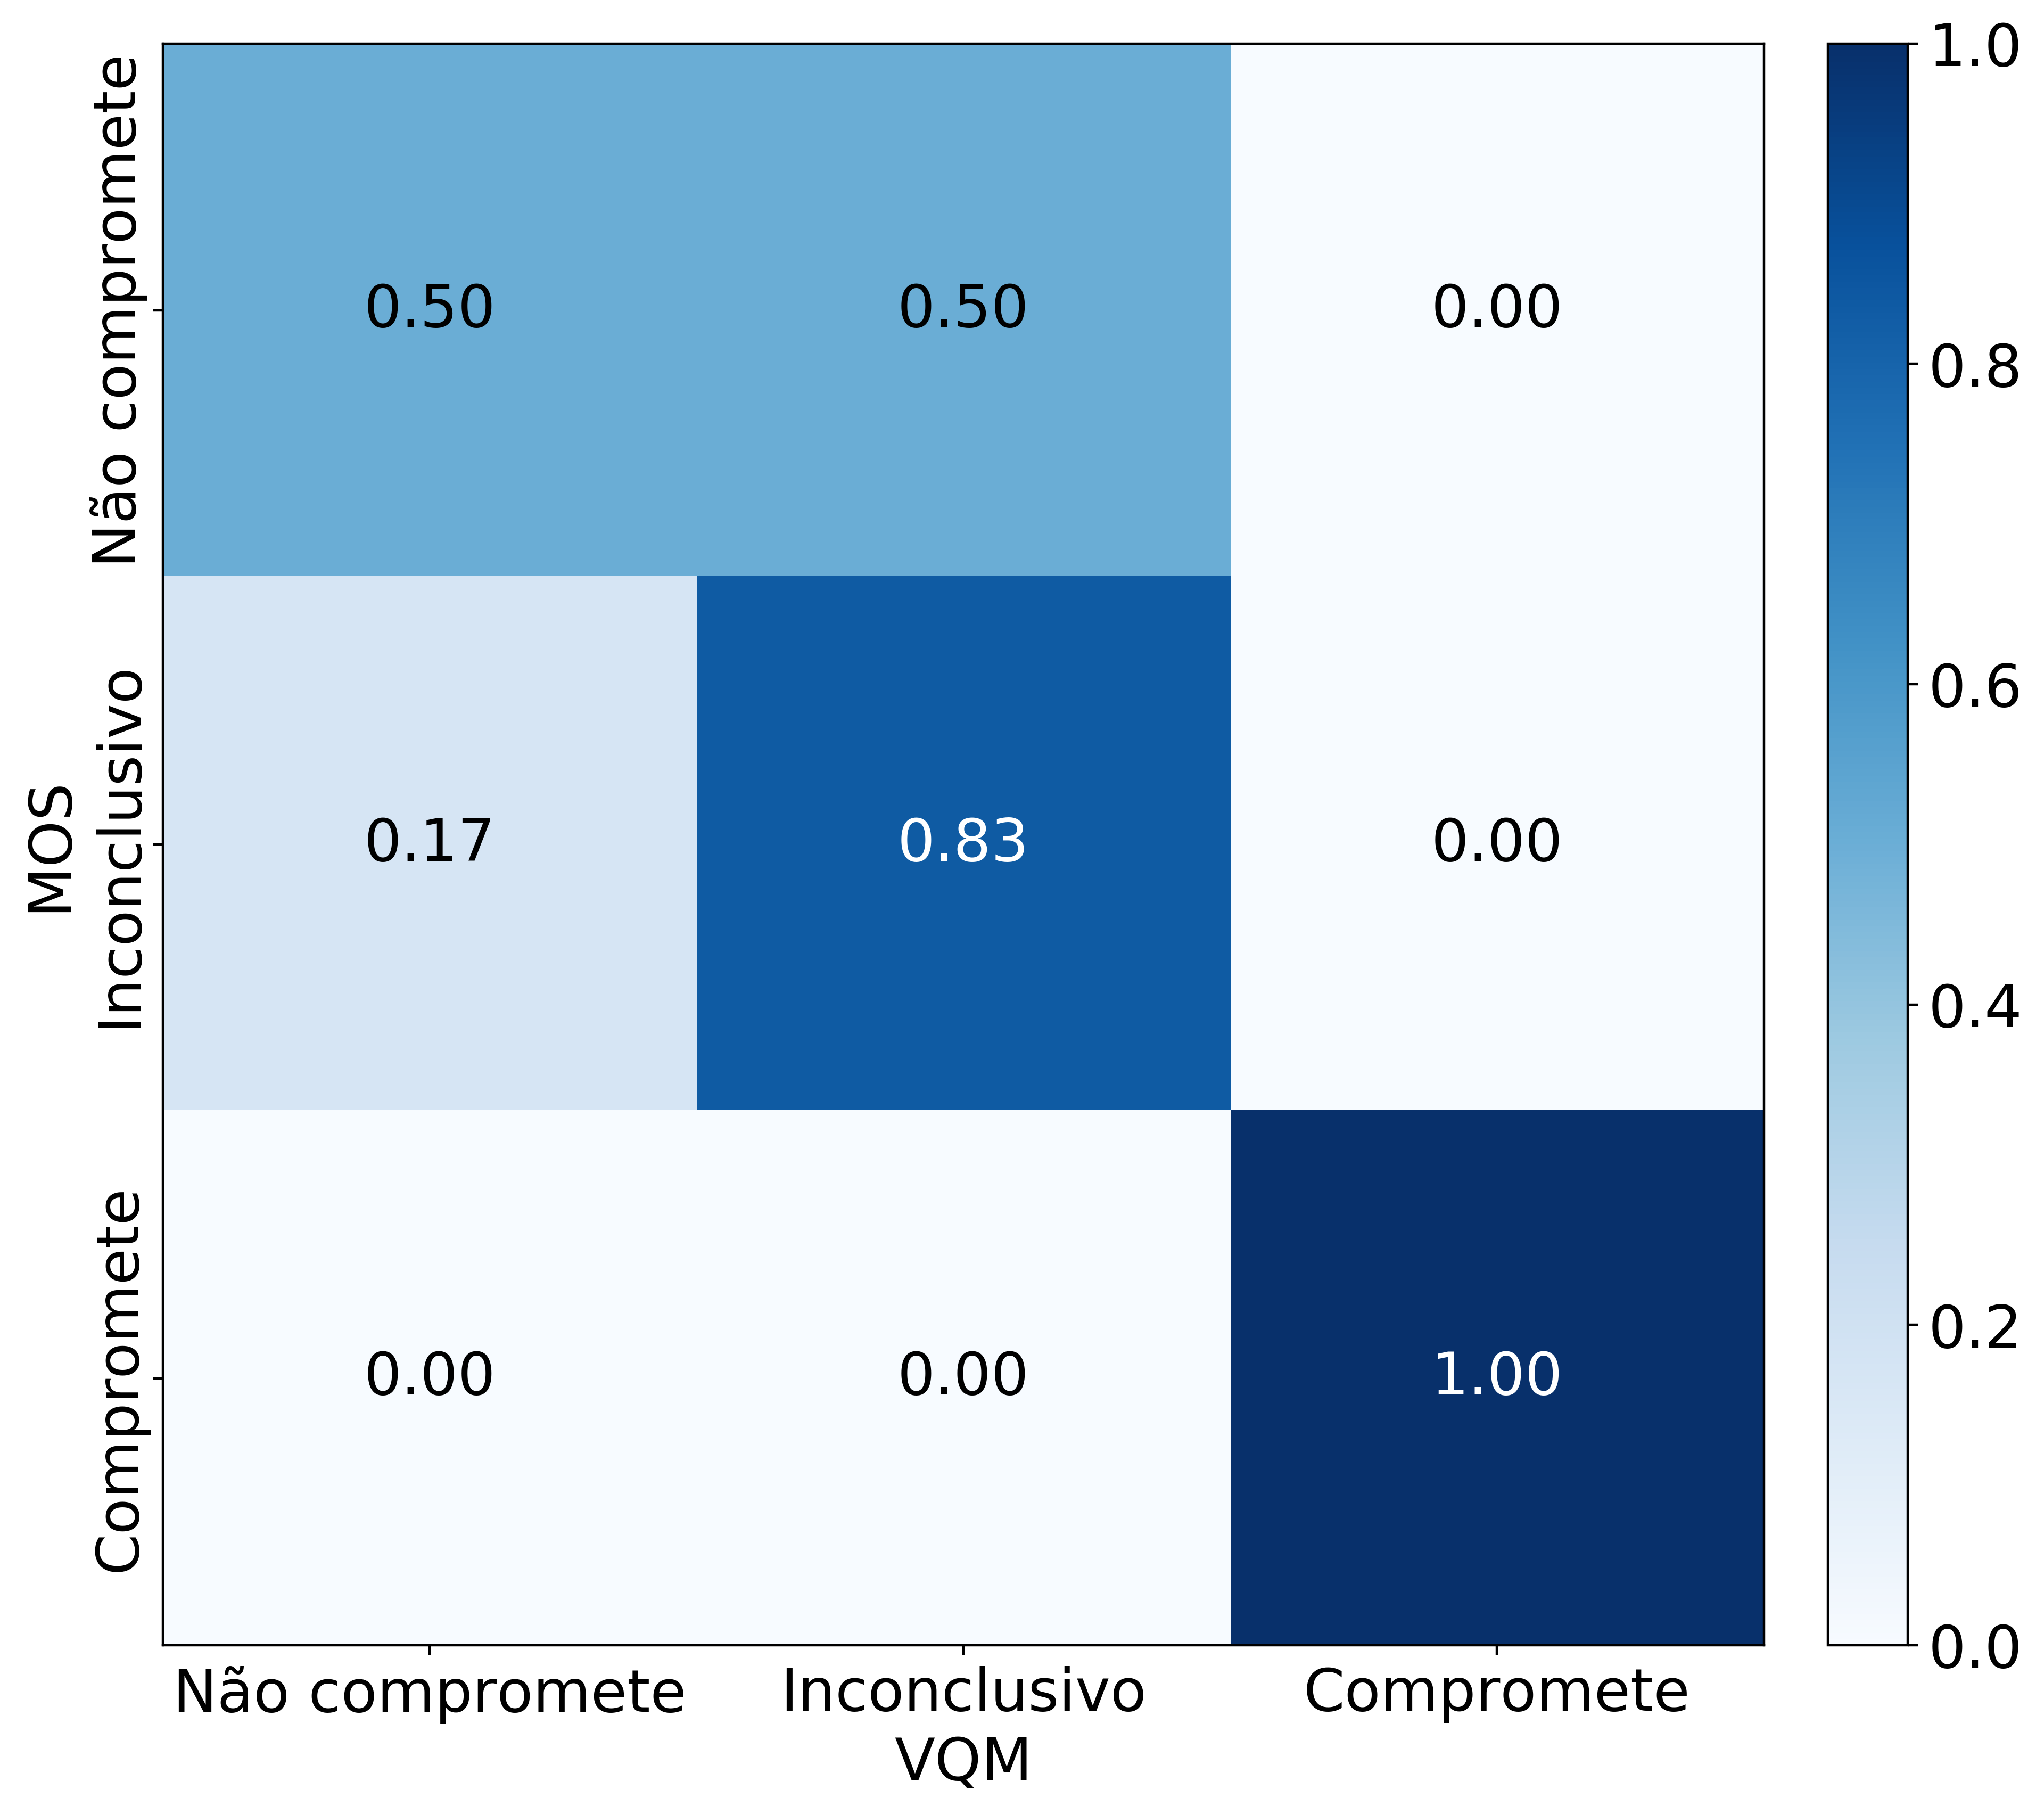

In [98]:
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
plot_confusion_matrix(target, y_pred, classes=['Não compromete', 'Inconclusivo', 'Compromete'], normalize=True, nome='confusion_jp2k')

In [187]:
jp2k['rede'] = y_pred

c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.889 0.49999999999999994 0.0
0.852 0.9166666666666667 0.0
0.99 0.49999999999999994 0.0
2.0 1.0 0.0


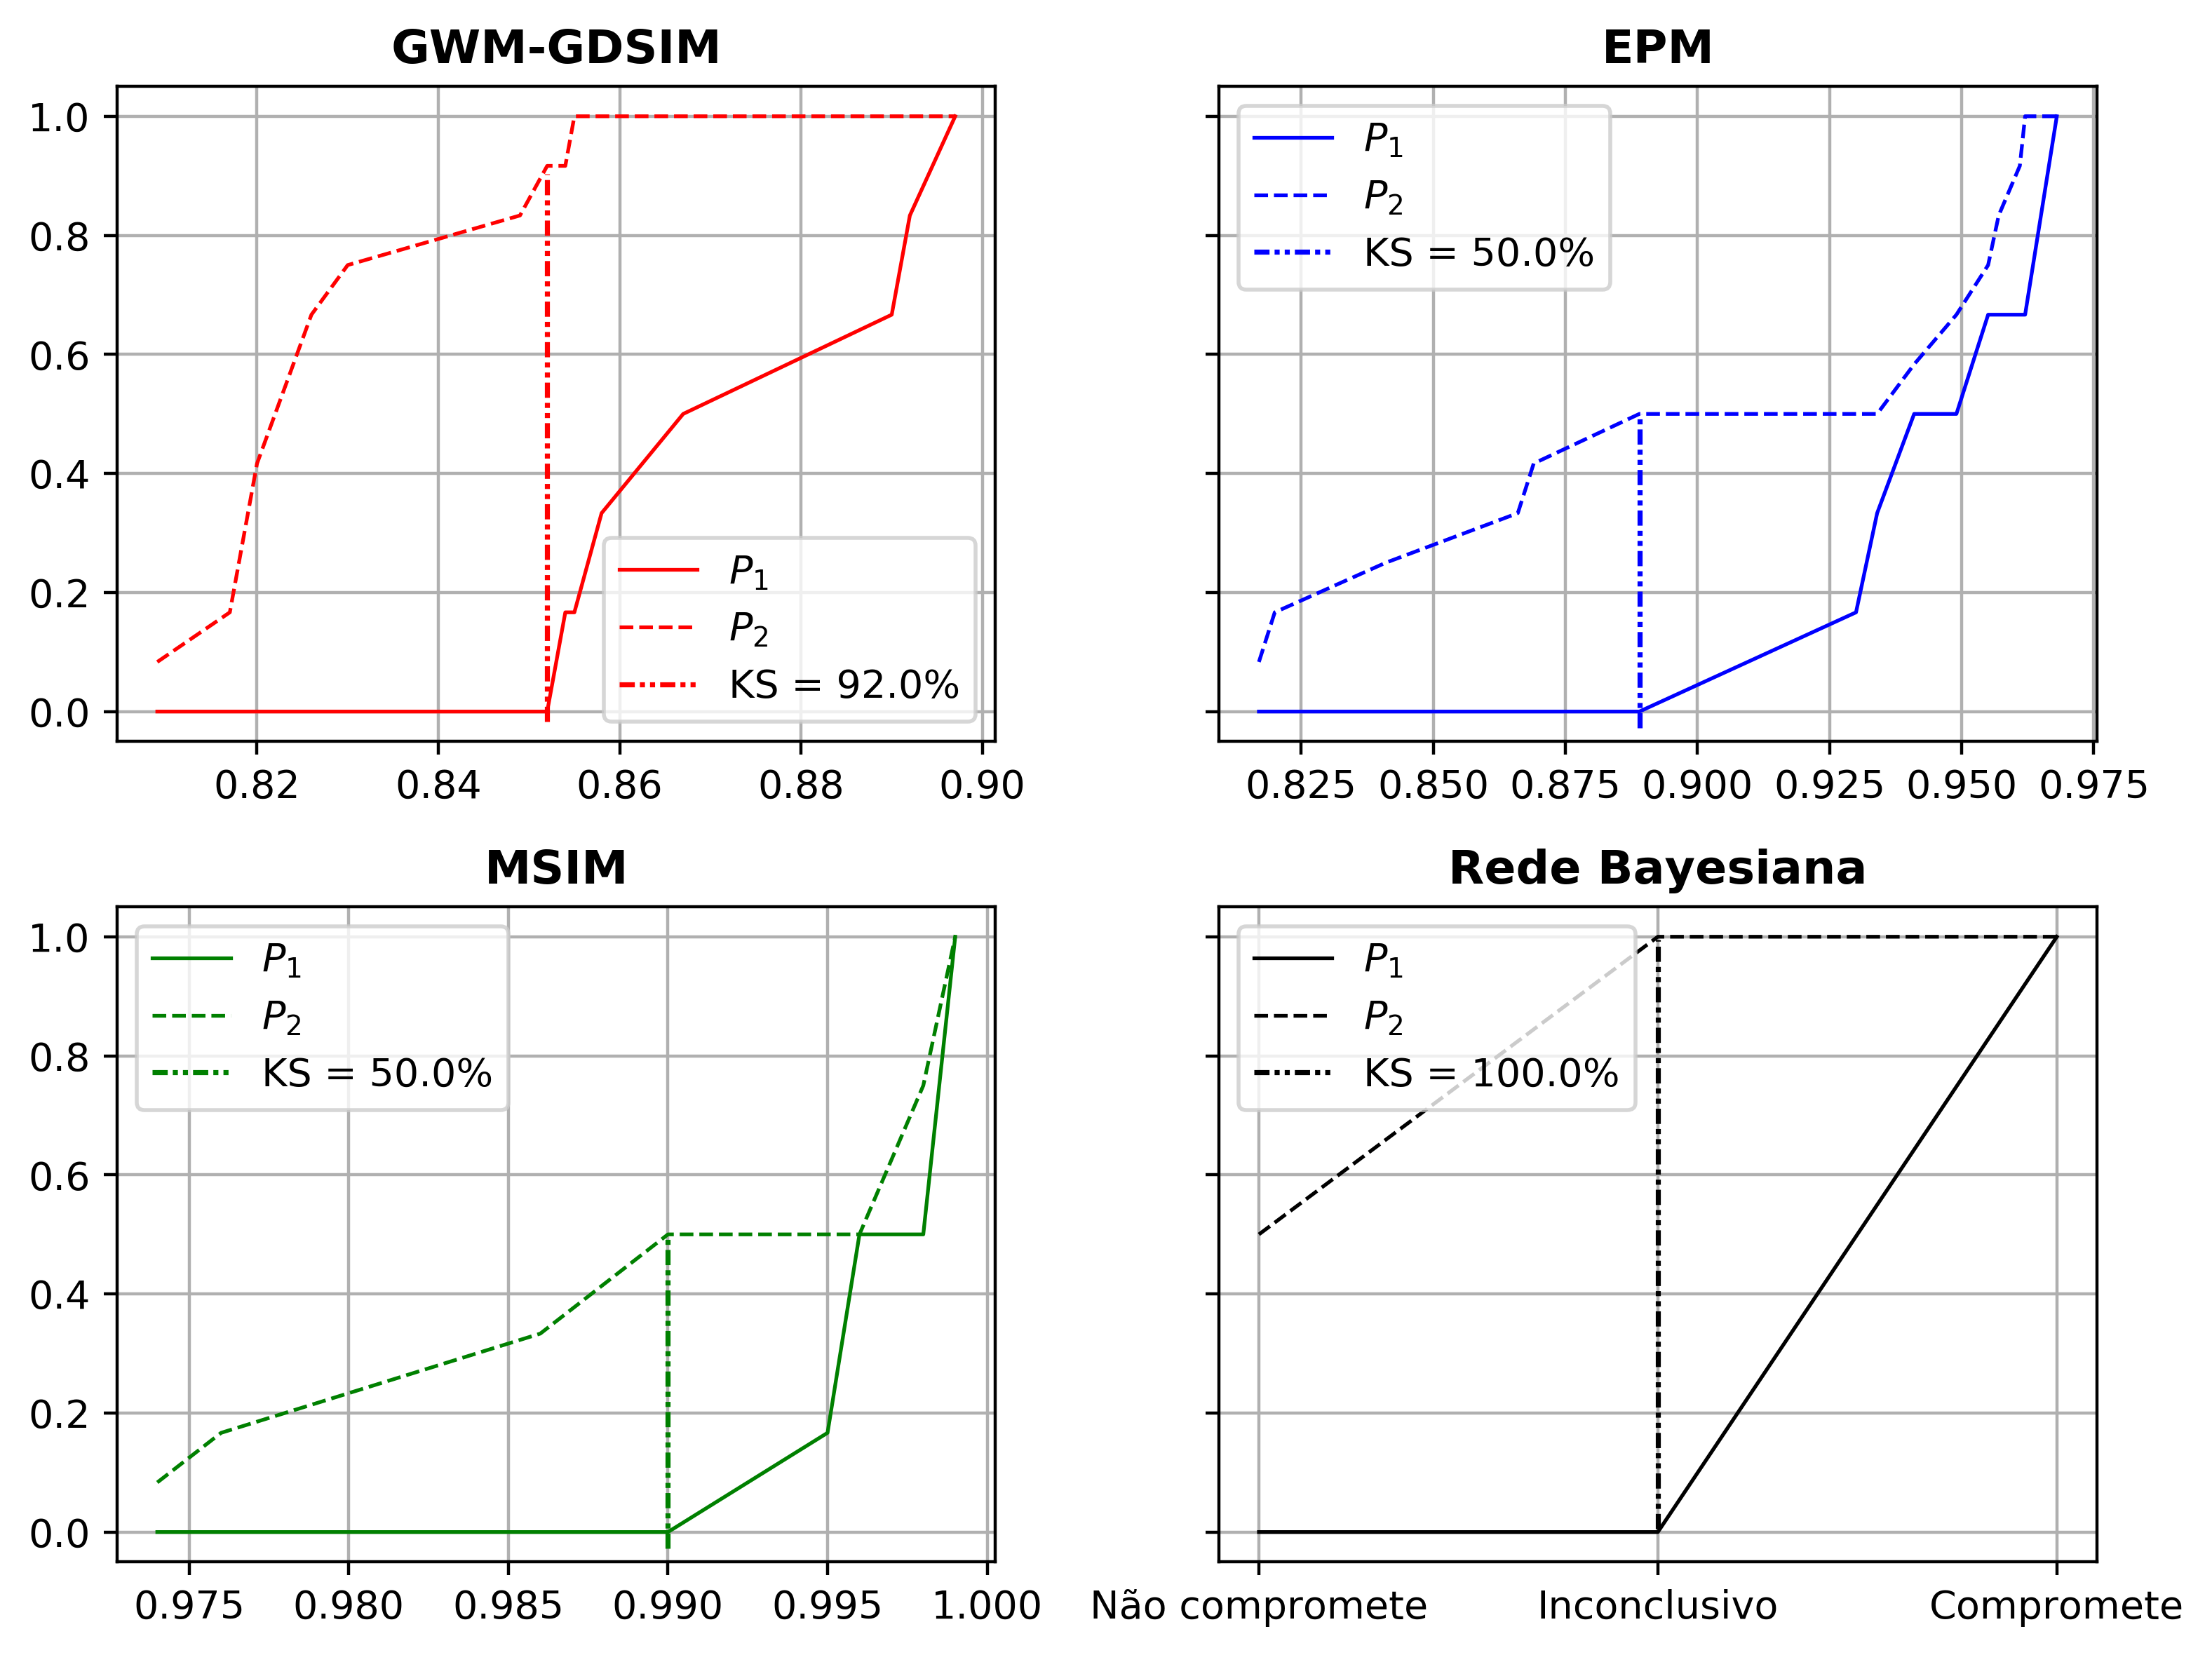

In [189]:
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=12)
def get_ks_plot(vqm):
    jp2k[vqm+'_trunc'] = list(map(lambda x: round(x, 3), jp2k[vqm].values))
    tpr = []
    fpr = []
    vqm_values = np.unique(np.sort(jp2k[vqm+'_trunc'].values))
    for w in vqm_values:
        temp  = jp2k[jp2k[vqm+'_trunc']==w]
        mos = temp['mos'].values
        n_aceita = sum(mos<3)/(sum(jp2k['mos'].values<3))
        aceita = sum(mos==3)/(sum(jp2k['mos'].values==3))
        tpr.append(n_aceita)
        fpr.append(aceita)
    #jpeg.drop([vqm+'_trunc'], axis=1, inplace=True)
    tpr = np.cumsum(tpr)
    fpr = np.cumsum(fpr)
    #vqm_values = np.insert(vqm_values, -1,1)
    s_index = np.argmax(np.abs(np.array(tpr)-np.array(fpr)))
    return tpr, fpr, s_index, vqm_values


tpr_gwm, fpr_gwm, s_index_gwm, gwm_values =get_ks_plot('gwm')

tpr_epm, fpr_epm, s_index_epm, epm_values = get_ks_plot('epm')
tpr_msim, fpr_msim, s_index_msim, msim_values = get_ks_plot('msim')
tpr_rede, fpr_rede, s_index_rede, rede_values = get_ks_plot('rede')
print (epm_values[s_index_epm], tpr_epm[s_index_epm], fpr_epm[s_index_epm])
print (gwm_values[s_index_gwm], tpr_gwm[s_index_gwm], fpr_gwm[s_index_gwm])
print (msim_values[s_index_msim], tpr_msim[s_index_msim], fpr_msim[s_index_msim])
print (rede_values[s_index_rede], tpr_rede[s_index_rede], fpr_rede[s_index_rede])

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2,
                               figsize=(8, 6), sharey=True, dpi=400)
#fig.suptitle('Imagens JPEG')
#ax1.plot(fpr, tpr, 'k',label= 'Rede bayesiana', linewidth = 0.9)

ax2.plot(epm_values, fpr_epm, 'b', linewidth = 0.95, label = r'$P_1$')
ax2.plot(epm_values, tpr_epm, 'b', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax2.axvline(x=epm_values[s_index_epm], ymin=fpr_epm[s_index_epm]+0.02, ymax=tpr_epm[s_index_epm], color='b', linewidth=1.3, label='KS = '+str(round((tpr_epm[s_index_epm] -fpr_epm[s_index_epm]), 2)*100)+'%', linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax1.plot(gwm_values, fpr_gwm, 'r', linewidth = 0.95, label = r'$P_1$')
ax1.plot(gwm_values, tpr_gwm, 'r', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax1.axvline(x=gwm_values[s_index_gwm], ymin=fpr_gwm[s_index_gwm]+0.03, ymax=tpr_gwm[s_index_gwm]-0.05, color='r', linewidth=1.3, label='KS = '+str(round((tpr_gwm[s_index_gwm] -fpr_gwm[s_index_gwm]), 2)*100) + '%', linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax3.plot(msim_values, fpr_msim, 'g', linewidth = 0.95, label = r'$P_1$')
ax3.plot(msim_values, tpr_msim, 'g', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax3.axvline(x=msim_values[s_index_msim], ymin=fpr_msim[s_index_msim]+0.02, ymax=tpr_msim[s_index_msim], color='g', linewidth=1.3, label='KS = '+str(round((tpr_msim[s_index_msim] -fpr_msim[s_index_msim]), 2)*100) + '%',  linestyle = (0, (3, 1, 1, 1, 1, 1)))

ax4.plot(rede_values, fpr_rede, 'k', linewidth = 0.95, label = r'$P_1$')
ax4.plot(rede_values, tpr_rede, 'k', linewidth = 0.95, linestyle = 'dashed', label = r'$P_2$')
ax4.axvline(x=rede_values[s_index_rede], ymin=0.05, ymax=0.95, color='k', linewidth=1.3, label='KS = '+str(round((tpr_rede[s_index_rede] -fpr_rede[s_index_rede]), 2)*100) + '%',  linestyle = (0, (3, 1, 1, 1, 1, 1)))


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.set_title('GWM-GDSIM', fontweight='bold')
ax2.set_title('EPM', fontweight='bold')
ax3.set_title('MSIM', fontweight='bold')
ax4.set_title('Rede Bayesiana', fontweight='bold')
ax4.set_xticks([1,2,3]) 
ax4.set_xticklabels(['Não compromete','Inconclusivo','Compromete'])
fig.tight_layout()
fig.savefig("ks_jp2k.pdf", bbox_inches='tight')

0.71 0.99 0.69 1.0


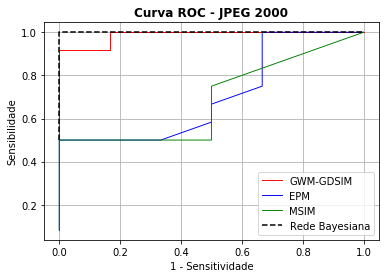

In [191]:
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=12)
print (round(metrics.auc(fpr_epm, tpr_epm), 2), round(metrics.auc(fpr_gwm, tpr_gwm), 2), round(metrics.auc(fpr_msim, tpr_msim) , 2), round(metrics.auc(fpr_rede, tpr_rede), 2))
fig = plt.figure()
plt.plot(fpr_gwm, tpr_gwm, 'r',label= 'GWM-GDSIM', linewidth=0.95)
plt.plot(fpr_epm, tpr_epm, 'b',label= 'EPM', linewidth=0.95)
plt.plot(fpr_msim, tpr_msim, 'g',label= 'MSIM', linewidth=0.95)
plt.plot(fpr_rede, tpr_rede, 'k--',label='Rede Bayesiana' )
plt.grid()
plt.title('Curva ROC - JPEG 2000', fontweight='bold')
plt.ylabel('Sensibilidade')
plt.xlabel('1 - Sensitividade')
plt.legend()
fig.savefig('roc_jp2k.pdf', bbox_inches='tight')

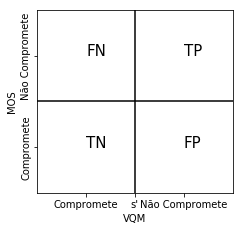

In [37]:
fig = plt.figure(figsize=(3.5,3.5))
#fig.suptitle('bold figure suptitle', fontsize=14)

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_ylabel('MOS')
ax.set_xlabel('VQM')

ax.text(3, 3, 'TP' , fontsize=15)

ax.text(1, 1, r'TN', fontsize=15)

ax.text(3, 1, 'FP', fontsize=15)

ax.text(1, 3, 'FN', fontsize=15)


ax.plot([0,2,4], [2,2,2], 'k')
ax.axvline(x=2, ymin=0, ymax=4, color='k')

plt.sca(ax)
plt.xticks([1,2,3], ['Compromete','s\'', 'Não Compromete'])
plt.yticks([1,3], ['Compromete', 'Não Compromete'])
plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
             rotation_mode="anchor")

ax.axis([0, 4, 0, 4])

plt.show()
fig.savefig('confusion_generica.pdf')